## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.cm as cm
import scipy.stats as stats
import random
import math
import copy
from cvxopt import matrix, solvers

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})
from os.path import dirname, join as pjoin
import scipy.io as sio
import statistics

## Loading inner and outer fault training datasets 

In [2]:
inner = np.zeros([5,146484])

inner1 = sio.loadmat('InnerRaceFault_vload_1.mat')
inner[0,:] = inner1['bearing']['gs'][0,0].ravel()
inner2 = sio.loadmat('InnerRaceFault_vload_2.mat')
inner[1,:] = inner2['bearing']['gs'][0,0].ravel()
inner3 = sio.loadmat('InnerRaceFault_vload_3.mat')
inner[2,:] = inner3['bearing']['gs'][0,0].ravel()
inner4 = sio.loadmat('InnerRaceFault_vload_4.mat')
inner[3,:] = inner4['bearing']['gs'][0,0].ravel()
inner5 = sio.loadmat('InnerRaceFault_vload_5.mat')
inner[4,:] = inner5['bearing']['gs'][0,0].ravel()

outer = np.zeros([5,146484])

outer1 = sio.loadmat('OuterRaceFault_vload_1.mat')
outer[0,:] = outer1['bearing']['gs'][0,0].ravel()
outer2 = sio.loadmat('OuterRaceFault_vload_2.mat')
outer[1,:] = outer2['bearing']['gs'][0,0].ravel()
outer3 = sio.loadmat('OuterRaceFault_vload_3.mat')
outer[2,:] = outer3['bearing']['gs'][0,0].ravel()
outer4 = sio.loadmat('OuterRaceFault_vload_4.mat')
outer[3,:] = outer4['bearing']['gs'][0,0].ravel()
outer5 = sio.loadmat('OuterRaceFault_vload_5.mat')
outer[4,:] = outer5['bearing']['gs'][0,0].ravel()

## Loading inner and outer fault test datasets 

In [3]:
innerTest = np.zeros([2,146484])

inner6 = sio.loadmat('InnerRaceFault_vload_6.mat')
innerTest[0,:] = inner6['bearing']['gs'][0,0].ravel()
inner7 = sio.loadmat('InnerRaceFault_vload_7.mat')
innerTest[1,:] = inner7['bearing']['gs'][0,0].ravel()

outerTest = np.zeros([2,146484])

outer6 = sio.loadmat('OuterRaceFault_vload_6.mat')
outerTest[0,:] = outer6['bearing']['gs'][0,0].ravel()
outer7 = sio.loadmat('OuterRaceFault_vload_7.mat')
outerTest[1,:] = outer7['bearing']['gs'][0,0].ravel()

## Computing mean for training datasets

In [4]:
innerMean = np.zeros([5,1])

innerMean[0] = statistics.mean(inner1['bearing']['gs'][0,0].ravel())
innerMean[1] = statistics.mean(inner2['bearing']['gs'][0,0].ravel())
innerMean[2] = statistics.mean(inner3['bearing']['gs'][0,0].ravel())
innerMean[3] = statistics.mean(inner4['bearing']['gs'][0,0].ravel())
innerMean[4] = statistics.mean(inner5['bearing']['gs'][0,0].ravel())

outerMean = np.zeros([5,1])

outerMean[0] = statistics.mean(outer1['bearing']['gs'][0,0].ravel())
outerMean[1] = statistics.mean(outer2['bearing']['gs'][0,0].ravel())
outerMean[2] = statistics.mean(outer3['bearing']['gs'][0,0].ravel())
outerMean[3] = statistics.mean(outer4['bearing']['gs'][0,0].ravel())
outerMean[4] = statistics.mean(outer5['bearing']['gs'][0,0].ravel())

## Computing mean for test datasets

In [5]:
innerMeanTest = np.zeros([2,1])

innerMeanTest[0] = statistics.mean(inner6['bearing']['gs'][0,0].ravel())
innerMeanTest[1] = statistics.mean(inner7['bearing']['gs'][0,0].ravel())

outerMeanTest = np.zeros([2,1])

outerMeanTest[0] = statistics.mean(outer6['bearing']['gs'][0,0].ravel())
outerMeanTest[1] = statistics.mean(outer7['bearing']['gs'][0,0].ravel())

## Computing standard deviation for training datasets

In [6]:
innerStdev = np.zeros([5,1])

innerStdev[0] = statistics.stdev(inner1['bearing']['gs'][0,0].ravel())
innerStdev[1] = statistics.stdev(inner2['bearing']['gs'][0,0].ravel())
innerStdev[2] = statistics.stdev(inner3['bearing']['gs'][0,0].ravel())
innerStdev[3] = statistics.stdev(inner4['bearing']['gs'][0,0].ravel())
innerStdev[4] = statistics.stdev(inner5['bearing']['gs'][0,0].ravel())

outerStdev = np.zeros([5,1])

outerStdev[0] = statistics.stdev(outer1['bearing']['gs'][0,0].ravel())
outerStdev[1] = statistics.stdev(outer2['bearing']['gs'][0,0].ravel())
outerStdev[2] = statistics.stdev(outer3['bearing']['gs'][0,0].ravel())
outerStdev[3] = statistics.stdev(outer4['bearing']['gs'][0,0].ravel())
outerStdev[4] = statistics.stdev(outer5['bearing']['gs'][0,0].ravel())

## Computing standard deviation for test datasets

In [7]:
innerStdevTest = np.zeros([2,1])

innerStdevTest[0] = statistics.stdev(inner6['bearing']['gs'][0,0].ravel())
innerStdevTest[1] = statistics.stdev(inner7['bearing']['gs'][0,0].ravel())

outerStdevTest = np.zeros([2,1])

outerStdevTest[0] = statistics.stdev(outer6['bearing']['gs'][0,0].ravel())
outerStdevTest[1] = statistics.stdev(outer7['bearing']['gs'][0,0].ravel())

## Computing skewness and kurtosis for training and test datasets

In [8]:
innerFluc = inner - innerMean
innerFlucTest = innerTest - innerMeanTest

innerSkewness = np.divide(np.mean(np.power(innerFluc,3),axis=1), np.power(innerStdev,3).ravel())
innerSkewnessTest = np.divide(np.mean(np.power(innerFlucTest,3),axis=1), np.power(innerStdevTest,3).ravel())

innerKurtosis = np.divide(np.mean(np.power(innerFluc,4),axis=1), np.power(innerStdev,4).ravel())
innerKurtosisTest = np.divide(np.mean(np.power(innerFlucTest,4),axis=1), np.power(innerStdevTest,4).ravel())

outerFluc = outer - outerMean
outerFlucTest = outerTest - outerMeanTest

outerSkewness = np.divide(np.mean(np.power(outerFluc,3),axis=1), np.power(outerStdev,3).ravel())
outerSkewnessTest = np.divide(np.mean(np.power(outerFlucTest,3),axis=1), np.power(outerStdevTest,3).ravel())

outerKurtosis = np.divide(np.mean(np.power(outerFluc,4),axis=1), np.power(outerStdev,4).ravel())
outerKurtosisTest = np.divide(np.mean(np.power(outerFlucTest,4),axis=1), np.power(outerStdevTest,4).ravel())

## Creating feature and label matrices

In [9]:
innerSkewness = innerSkewness.reshape(-1, 1)
innerKurtosis = innerKurtosis.reshape(-1, 1)

matrixTemp = np.hstack((innerSkewness, innerKurtosis))

innerSkewnessTest = innerSkewnessTest.reshape(-1, 1)
innerKurtosisTest = innerKurtosisTest.reshape(-1, 1)

matrixTest = np.hstack((innerSkewnessTest, innerKurtosisTest))

outerSkewness = outerSkewness.reshape(-1, 1)
outerKurtosis = outerKurtosis.reshape(-1, 1)

matrix2Temp = np.hstack((outerSkewness, outerKurtosis))

outerSkewnessTest = outerSkewnessTest.reshape(-1, 1)
outerKurtosisTest = outerKurtosisTest.reshape(-1, 1)

matrix2Test = np.hstack((outerSkewnessTest, outerKurtosisTest))

In [10]:
x = np.vstack((matrixTemp,matrix2Temp))

X = np.vstack((matrixTest,matrix2Test))

In [11]:
y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

## Solving for lambdas using qp solver

In [12]:
def optimisedLambdas(x,y):

    H = np.zeros((y.shape[0], y.shape[0]))

    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            H[i,j] = y[i] * y[j] * np.dot(x[i], x[j])

    H = matrix(H)

    q = matrix(-np.ones(y.shape[0]))

    A = matrix(y.reshape(1, -1), tc = 'd')

    b = matrix([0.0])

    G = matrix(np.diag(np.ones(y.shape[0]) * -1))

    h = matrix(np.zeros(y.shape[0]))

    solution = solvers.qp(H, q, G, h, A, b)

    lambdas = np.array(solution['x']).flatten()

    return lambdas

In [13]:
lambdas = optimisedLambdas(x,y)

     pcost       dcost       gap    pres   dres
 0: -8.6196e-01 -1.5592e+00  2e+01  4e+00  2e+00
 1: -9.2891e-01 -3.5877e-01  4e+00  8e-01  3e-01
 2: -3.8424e-03 -1.7961e-02  6e-02  8e-03  3e-03
 3: -3.4039e-03 -1.0715e-02  7e-03  2e-18  1e-15
 4: -6.7043e-03 -7.8056e-03  1e-03  9e-19  9e-16
 5: -7.7320e-03 -7.7462e-03  1e-05  2e-18  7e-16
 6: -7.7430e-03 -7.7431e-03  1e-07  1e-18  1e-15
 7: -7.7431e-03 -7.7431e-03  1e-09  2e-18  7e-16
Optimal solution found.


## Solving for weight vector

In [14]:
def wCalculate(lambdas, x, y):

    w = [0,0]

    for i in range(x.shape[0]):
        w[0] += lambdas[i]*y[i]*x[i,0]
        w[1] += lambdas[i]*y[i]*x[i,1]
    
    w = np.array(w)

    return w

In [15]:
w = wCalculate(lambdas, x, y)

## Solving for bias

In [16]:
def bCalculate(w, sv_x, sv_y):
    
    bTemp = sv_y - np.dot(sv_x, w)

    b = np.mean(bTemp)
    return b

In [17]:
sv = lambdas > 1e-5
index = np.arange(len(lambdas))[sv.ravel()]
svLambdas = lambdas[sv]
sv_y = y[sv.ravel()]
sv_x = x[sv.ravel()]

In [18]:
b = bCalculate(w, sv_x, sv_y)

## Classifying test datapoints

In [19]:
def classify(test, w, b):
    decision = np.dot(w, test) + b
    return 1 if decision > 0 else -1

In [20]:
classify(X[0], w, b)

-1

In [22]:
classify(X[1], w, b)

-1

In [23]:
classify(X[2], w, b)

1

In [24]:
classify(X[3], w, b)

1

## Plotting

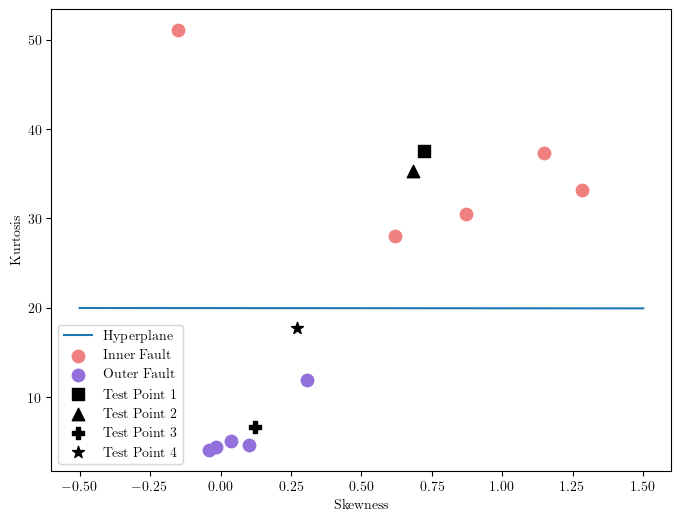

In [25]:
x1 = np.linspace(-0.5, 1.5, 100)

x2 = (-w[0] / w[1]) * x1 - b / w[1]

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, label='Hyperplane')
plt.scatter(innerSkewness, innerKurtosis, 80, color='lightcoral', label='Inner Fault')
plt.scatter(outerSkewness, outerKurtosis, 80, color='mediumpurple', label='Outer Fault')
plt.scatter(X[0,0], X[0,1], 80, marker = 's', color='k', label='Test Point 1')
plt.scatter(X[1,0], X[1,1], 80, marker = '^', color='k', label='Test Point 2')
plt.scatter(X[2,0], X[2,1], 80, marker = 'P', color='k', label='Test Point 3')
plt.scatter(X[3,0], X[3,1], 80, marker = '*', color='k', label='Test Point 4')

plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.legend()

plt.savefig('Plots/2bi.pdf', bbox_inches='tight')

## Similar SVM analysis as above except now training and test datasets are divided into sub intervals

In [27]:
num = 10
subSize = inner.shape[1] // num

innerSkewSub = []
innerKurtosisSub = []
outerSkewSub = []
outerKurtosisSub = []

innerSkewSubTest = []
innerKurtosisSubTest = []
outerSkewSubTest = []
outerKurtosisSubTest = []

for i in range(num):
    for j in range(5):
        startInd = i * subSize
        endInd = (i + 1) * subSize

        innerSub = inner[j][startInd:endInd]
        outerSub = outer[j][startInd:endInd]

        tempInnerSkew = stats.skew(innerSub)
        tempInnerKurtosis = stats.kurtosis(innerSub)
        tempOuterSkew = stats.skew(outerSub)
        tempOuterKurtosis = stats.kurtosis(outerSub)

        innerSkewSub.append(tempInnerSkew)
        innerKurtosisSub.append(tempInnerKurtosis)
        outerSkewSub.append(tempOuterSkew)
        outerKurtosisSub.append(tempOuterKurtosis)
        
for i in range(num):
    for j in range(2):
        startInd = i * subSize
        endInd = (i + 1) * subSize

        innerSubTest = innerTest[j][startInd:endInd]
        outerSubTest = outerTest[j][startInd:endInd]

        tempInnerSkewTest = stats.skew(innerSubTest)
        tempInnerKurtosisTest = stats.kurtosis(innerSubTest)
        tempOuterSkewTest = stats.skew(outerSubTest)
        tempOuterKurtosisTest = stats.kurtosis(outerSubTest)

        innerSkewSubTest.append(tempInnerSkewTest)
        innerKurtosisSubTest.append(tempInnerKurtosisTest)
        outerSkewSubTest.append(tempOuterSkewTest)
        outerKurtosisSubTest.append(tempOuterKurtosisTest)

In [28]:
innerSkewSub = np.array(innerSkewSub).reshape(-1, 1)
innerKurtosisSub = np.array(innerKurtosisSub).reshape(-1, 1)

innerSkewSubTest = np.array(innerSkewSubTest).reshape(-1, 1)
innerKurtosisSubTest = np.array(innerKurtosisSubTest).reshape(-1, 1)

matrixSub = np.hstack((innerSkewSub, innerKurtosisSub))
matrixSubTest = np.hstack((innerSkewSubTest, innerKurtosisSubTest))

outerSkewSub = np.array(outerSkewSub).reshape(-1, 1)
outerKurtosisSub = np.array(outerKurtosisSub).reshape(-1, 1)
outerSkewSubTest = np.array(outerSkewSubTest).reshape(-1, 1)
outerKurtosisSubTest = np.array(outerKurtosisSubTest).reshape(-1, 1)

matrix2Sub = np.hstack((outerSkewSub, outerKurtosisSub))
matrix2SubTest = np.hstack((outerSkewSubTest, outerKurtosisSubTest))

In [29]:
x1 = np.vstack((matrixSub,matrix2Sub))
X1 = np.vstack((matrixSubTest,matrix2SubTest))

yInner = np.full((50, 1), -1)
yOuter = np.full((50, 1), 1)

y1 = np.vstack((yInner, yOuter))

In [30]:
lambdas1 = optimisedLambdas(x1,y1)

     pcost       dcost       gap    pres   dres
 0: -1.2355e+01 -2.3936e+01  4e+02  2e+01  2e+00
 1: -1.3854e+01 -1.2672e+01  2e+02  9e+00  9e-01
 2: -1.2196e+01 -4.8896e+00  9e+01  4e+00  4e-01
 3: -3.9605e-01 -3.8060e-02  5e+00  2e-01  2e-02
 4: -1.6003e-03 -2.9470e-02  6e-02  1e-03  1e-04
 5: -1.0376e-02 -2.1123e-02  2e-02  4e-04  4e-05
 6: -1.4814e-02 -2.1518e-02  8e-03  6e-05  5e-06
 7: -2.0627e-02 -2.0806e-02  2e-04  7e-07  7e-08
 8: -2.0749e-02 -2.0750e-02  2e-06  7e-09  7e-10
 9: -2.0750e-02 -2.0750e-02  2e-08  7e-11  7e-12
Optimal solution found.


In [31]:
w1 = wCalculate(lambdas1, x1, y1)

In [32]:
sv1 = lambdas1 > 1e-5
index = np.arange(len(lambdas1))[sv1.ravel()]
svLambdas1 = lambdas1[sv1]
sv_y1 = y1[sv1.ravel()]
sv_x1 = x1[sv1.ravel()]

In [33]:
b1 = bCalculate(w1, sv_x1, sv_y1)

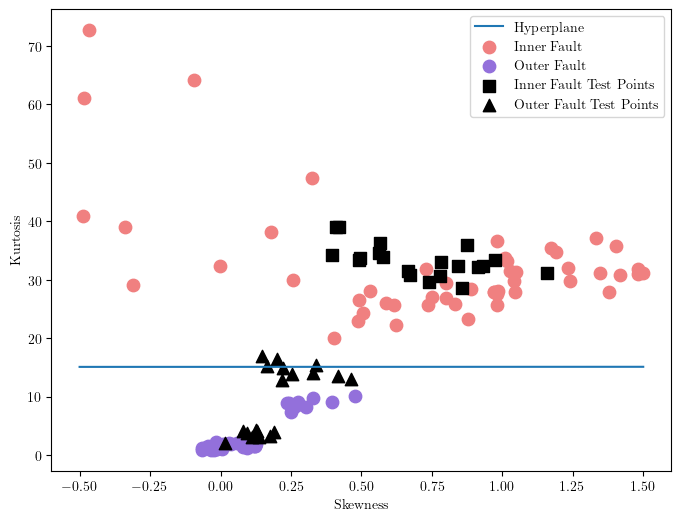

In [34]:
x1 = np.linspace(-0.5, 1.5, 100)

x2 = (-w1[0] / w1[1]) * x1 - b1 / w1[1]

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, label='Hyperplane')
plt.scatter(innerSkewSub, innerKurtosisSub, 80, color='lightcoral', label='Inner Fault')
plt.scatter(outerSkewSub, outerKurtosisSub, 80, color='mediumpurple', label='Outer Fault')
plt.scatter(X1[0:20,0], X1[0:20,1], 80, marker = 's', color='k', label='Inner Fault Test Points')
plt.scatter(X1[20:40,0], X1[20:40,1], 80, marker = '^', color='k', label='Outer Fault Test Points')

plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.legend()

plt.savefig('Plots/2bii.pdf', bbox_inches='tight')

# Alternative Approach

In [35]:
def fx(xi, yi, lambdas, b, x):
    val = b
    
    for i in range(x.shape[0]):
        val += lambdas[i] * y[i] * ((xi[i, :].T@x))
    return val

In [36]:
tol = 10**-6
C = 0.01
dPoints = x.shape[0]
passes = 0
b = 0
lambdas = np.zeros((dPoints,1))
lambdasOld = np.zeros((dPoints,1))
E = np.zeros((dPoints,1))
maxPasses = 30

while passes < maxPasses:
    numChangedLambdas = 0
    
    for i in range(dPoints): 
        E[i] = fx(x, y, lambdas, b, x[i,:]) - y[i]
        if (y[i]*E[i] < -tol and lambdas[i] < C) or (y[i]*E[i] > tol and lambdas[i] > 0):
            j = random.randrange(dPoints)
            while j == i:
                j = random.randrange(dPoints)
                
            E[j] = fx(x, y, lambdas, b, x[j,:]) - y[j]
            
            lambdasOld[i] = lambdas[i]
            lambdasOld[j] = lambdas[j]
            
            if y[i] != y[j]:
                L = max(0, lambdas[j] - lambdas[i])
                H = min(C, C + lambdas[j] - lambdas[i])
            else:
                L = max(0, lambdas[i] + lambdas[j] - C)
                H = min(C, lambdas[i] + lambdas[j])
                
            if L == H:
                continue
            
            eta = 2 * np.dot(x[i,:], x[j,:]) - np.dot(x[i,:], x[i,:]) - np.dot(x[j,:], x[j,:])
            
            if eta == 0:
                continue
            
            lambdas[j] = lambdas[j] - (y[j] * (E[i] - E[j])) / eta
            
            if lambdas[j] > H:
                lambdas[j] = H
            elif lambdas[j] < L:
                lambdas[j] = L
               
            if abs(lambdas[j] - lambdasOld[j]) < tol:
                continue
                
            lambdas[i] = lambdas[i] + y[i]*y[j]*(lambdasOld[j] - lambdas[j])
            
            numChangedLambdas += 1
    
    if numChangedLambdas == 0:
        passes += 1
    else:
        passes = 0